### 0.0 Introduction
This is an analysis of weather data in Kenya's major towns. These towns are Nairobi, Mombasa, Kisumu, Malindi and Eldoret.

The data was downloaded from **Reliable Prognosis [website](https://rp5.ru/).**

### 0.1 Load Modules

In [1]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import glob

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.ticker as mticker


# Use white grid plot background from seaborn
# sns.set(font_scale=1.5, style="whitegrid")

### 0.2 Load Data

In [2]:
# check file names
for file in glob.glob('data/*.gz'):
    city = str.title(str(file).split('/')[1].split('_')[0])
    print(file," ",city)

data/eldoret_weather.gz   Eldoret
data/kisumu_weather.gz   Kisumu
data/malindi_weather.gz   Malindi
data/mombasa_weather.gz   Mombasa
data/nairobi_weather.gz   Nairobi


In [3]:
# load files
# create empty dataframe
data = pd.DataFrame()

for file in glob.glob('data/*.gz'):
    try:
        df = pd.read_csv(file,sep=";",skiprows=6,index_col=False,
                 encoding='UTF-8', low_memory=False)
        # rename the first column
        df = df.rename(columns={df.columns[0]:'Time'})
        # get city name & add to dataframe
        city = str.title(str(file).split('/')[1].split('_')[0])
        df.insert(loc=0,column='City',value= city)
        # append df to data
        data = data.append(df,ignore_index=False)
        print(city,"weather data has",df.shape[0],"rows and",df.shape[1], "columns")
    except Exception as e:
        print("Error reading data from this file: ", file, e)

# drop blank column
data = data.drop('Unnamed: 13',axis=1)

Eldoret weather data has 22169 rows and 30 columns
Kisumu weather data has 22554 rows and 30 columns
Malindi weather data has 45445 rows and 15 columns
Mombasa weather data has 24307 rows and 30 columns
Nairobi weather data has 21548 rows and 30 columns


In [4]:
# check shape of data
data.shape

(136023, 33)

In [5]:
# column names
cols = [x for x in data.columns]
print(cols)

['City', 'Time', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'P0', "W'W'", 'c']


### 0.3 Data Overview

In [6]:
# top rows
data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
0,Eldoret,29.12.2020 09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eldoret,29.12.2020 03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Eldoret,29.12.2020 00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# bottom rows
data.tail(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
21545,Nairobi,13.02.2009 15:00,26.0,NaN,NaN,NaN,34.0,Wind blowing from the east-northeast,7.0,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21546,Nairobi,13.03.2005 09:00,19.8,NaN,NaN,NaN,80.0,Wind blowing from the north-east,2.0,NaN,...,16.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21547,Nairobi,24.02.2005 15:00,31.9,NaN,NaN,NaN,22.0,Wind blowing from the north-east,5.0,NaN,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136023 entries, 0 to 21547
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   City    136023 non-null  object 
 1   Time    136023 non-null  object 
 2   T       135363 non-null  float64
 3   Po      18208 non-null   float64
 4   P       68847 non-null   float64
 5   Pa      12140 non-null   float64
 6   U       134872 non-null  float64
 7   DD      135245 non-null  object 
 8   Ff      135286 non-null  float64
 9   ff10    56 non-null      float64
 10  ff3     0 non-null       float64
 11  N       90528 non-null   object 
 12  WW      92178 non-null   object 
 13  W1      11134 non-null   object 
 14  W2      11132 non-null   object 
 15  Tn      12695 non-null   float64
 16  Tx      12762 non-null   float64
 17  Cl      87680 non-null   object 
 18  Nh      88381 non-null   object 
 19  H       88845 non-null   object 
 20  Cm      79843 non-null   object 
 21  Ch      608

#### 0.3.1 Missing Values
Let's see columns that have the highest number of missing values

In [9]:
# calculate % of missing values
percent_missing_vals = np.round(data.isnull().mean()*100,2)
missing_vals_df = pd.DataFrame({'column_name':data.columns,'pct_missing':percent_missing_vals})
missing_vals_df = missing_vals_df.sort_values('pct_missing',ascending=False)
missing_vals_df = missing_vals_df.reset_index(drop=True)
missing_vals_df.head()

,column_name,pct_missing
0,Tg,100.00
1,ff3,100.00
2,E,100.00
3,sss,99.99
4,E',99.99


We can drop the columns with more than 90% data missing

In [10]:
# select columns with more than
# 94% missing data
cols_to_drop = [x for x in missing_vals_df[missing_vals_df['pct_missing']>90]['column_name']]
print(cols_to_drop)

# data = data.drop(cols_to_drop,axis=1)
# data.head()

['Tg', 'ff3', 'E', 'sss', "E'", 'ff10', "W'W'", 'W2', 'W1', 'Pa', 'Tn', 'Tx']


### 1.0 Temperature Analysis

In [11]:
# split time into date & time
clean_data = data.copy()
clean_data[['Date','time']] = clean_data['Time'].str.split(" ",expand=True)

# clean date
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
clean_data['year_month'] = clean_data['Date'].dt.strftime('%m-%Y')
clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['Month_Name'] = clean_data['Date'].dt.strftime('%b')
clean_data['Day'] = clean_data['Date'].dt.day
clean_data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,P0,W'W',c,Date,time,year_month,Year,Month,Month_Name,Day
0,Eldoret,29.12.2020 09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,NaN,NaN,NaN,2020-12-29,09:00,12-2020,2020,12,Dec,29
1,Eldoret,29.12.2020 03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,NaN,NaN,NaN,2020-12-29,03:00,12-2020,2020,12,Dec,29
2,Eldoret,29.12.2020 00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,NaN,NaN,NaN,2020-12-29,00:00,12-2020,2020,12,Dec,29


#### 1.1 Summarize Temperature by Date

In [12]:
city_temp_by_date = clean_data.groupby(['City','Date'])['T'].mean().rename('Temp').reset_index()
city_temp_by_date = city_temp_by_date.sort_values(by=['City','Date'], ascending=True)
city_temp_by_date.head()

,City,Date,Temp
0,Eldoret,2009-02-13,25.500000
1,Eldoret,2009-02-16,25.600000
2,Eldoret,2010-01-02,20.683333
3,Eldoret,2010-01-03,17.150000
4,Eldoret,2010-01-07,17.700000


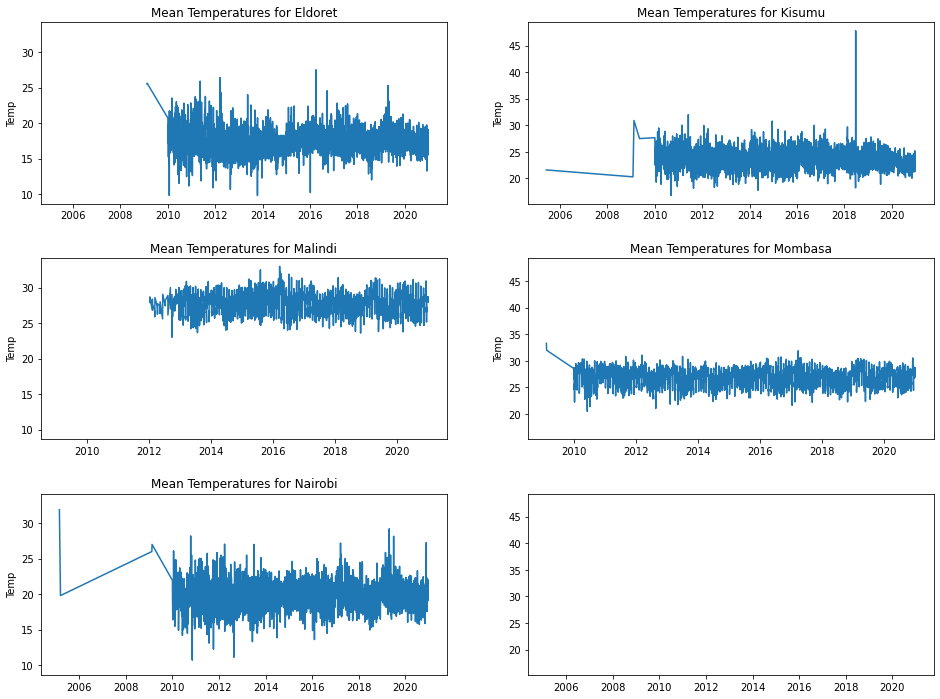

In [13]:
# plot mean temperatures by city
cities = [x for x in city_temp_by_date['City'].unique()]

fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.2)
(ax1,ax2),(ax3,ax4), (ax5, ax6) = gs.subplots(sharey='col',sharex='row')

# get axes list
axes_list = [x for x in fig.axes]

# plot data
for i in range(len(cities)):
    filtered_data = city_temp_by_date[city_temp_by_date['City']==cities[i]]
    sns.lineplot(x='Date',y='Temp',data = filtered_data,ax=axes_list[i])
    axes_list[i].set_title('Mean Temperatures for ' + cities[i])
    axes_list[i].set_xlabel('')


# remove inside labels
# for ax in axes_list:
#     ax.label_outer()

#### 1.2 Summarize Temperatures by Month

In [14]:
city_temp_by_month = clean_data.groupby(['City','year_month'])['T'].mean().rename('Temp').reset_index()
city_temp_by_month = city_temp_by_month.sort_values(by=['City','year_month',], ascending=True)
city_temp_by_month['Temp'] = np.round(city_temp_by_month['Temp'],1)
city_temp_by_month['year_month'] = pd.to_datetime(city_temp_by_month['year_month'])
city_temp_by_month.head(5)

,City,year_month,Temp
0,Eldoret,2010-01-01,17.1
1,Eldoret,2011-01-01,17.9
2,Eldoret,2012-01-01,17.0
3,Eldoret,2013-01-01,16.9
4,Eldoret,2014-01-01,17.5


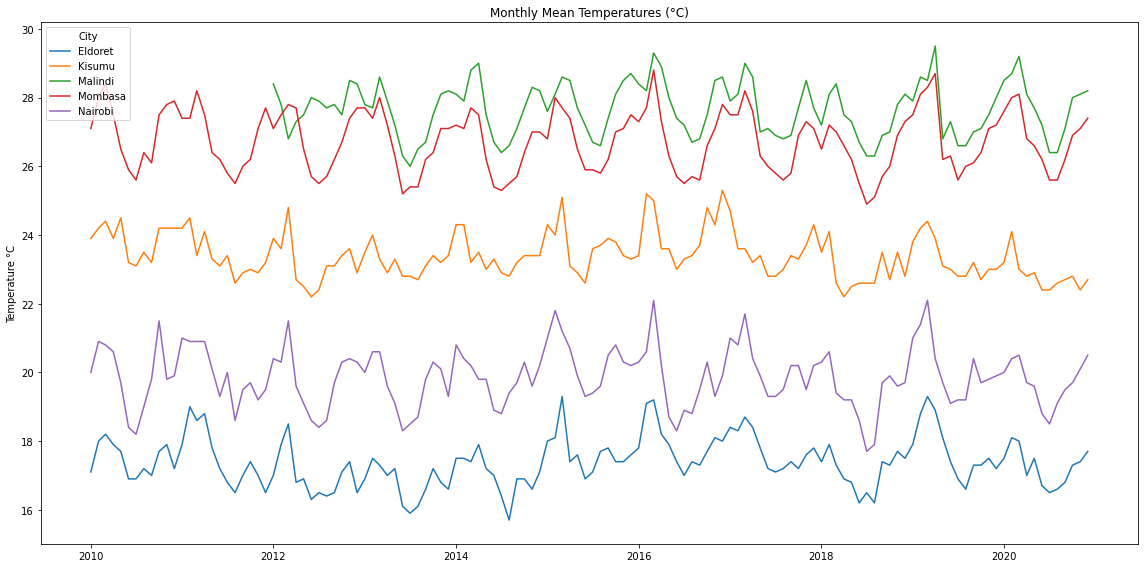

In [15]:
# plot data for 2010 onwards
city_temp_by_month = city_temp_by_month[city_temp_by_month['year_month']>='2010']

# plot distribution
fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='year_month',y='Temp',hue='City',data=city_temp_by_month,ax=ax)
plt.title('Monthly Mean Temperatures (°C)')
plt.ylabel('Temperature °C')
plt.xlabel('')
plt.tight_layout()
plt.show()


#### 1.3 Summarize Temperatures by Year

In [16]:
# mean temperatures by month
mean_temp_by_year = clean_data.groupby(['City','Year'])['T'].mean().rename('Temp').reset_index()
mean_temp_by_year = mean_temp_by_year.sort_values(by=['City','Year'], ascending=True)
mean_temp_by_year['Temp'] = np.round(mean_temp_by_year['Temp'],1)
mean_temp_by_year.head()
# mean_temp_by_month = mean_temp_by_month[mean_temp_by_month['Year']>=2010]

,City,Year,Temp
0,Eldoret,2009,25.6
1,Eldoret,2010,17.5
2,Eldoret,2011,17.5
3,Eldoret,2012,17.0
4,Eldoret,2013,16.8


#### 1.4 Summarize Temperatures by Year

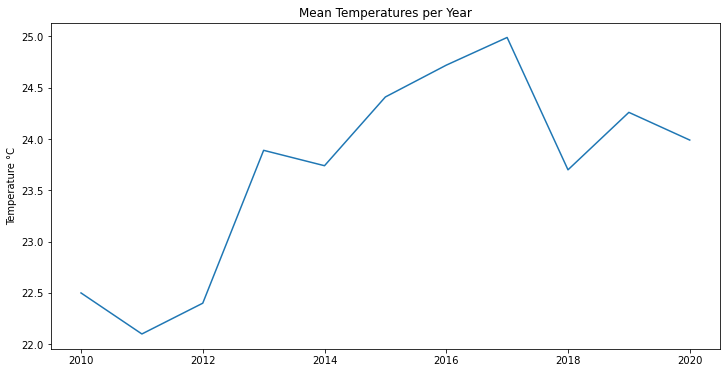

In [17]:
mean_temp_by_year = clean_data.groupby(['Year'])['T'].mean().rename('Temp').reset_index()
mean_temp_by_year = mean_temp_by_year.sort_values(by='Year')
mean_temp_by_year['Temp'] = np.round(mean_temp_by_year['Temp'],2)
mean_temp_by_year = mean_temp_by_year[mean_temp_by_year['Year']>=2010]

# plot yearly distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='Year',y='Temp',data=mean_temp_by_year,ax=ax)
plt.title('Mean Temperatures per Year')
plt.ylabel('Temperature °C')
plt.xlabel('')
plt.show()

From the graph we can see that the mean temperatures were between 22°C and 25°C in the last decade though rising between 2012 and 2017

### 2.0 Precipitation Analysis

In [18]:
# clean up precipitation data
clean_data['RRR'] = np.where(clean_data['RRR']=='Trace of precipitation',0,clean_data['RRR'])
clean_data['RRR'] = np.where(clean_data['RRR']=='No precipitation',0,clean_data['RRR'])

clean_data['RRR'] = clean_data['RRR'].astype(float)
clean_data['year_month'] = pd.to_datetime(clean_data['year_month'])

# remove NA values
clean_data_rf = clean_data[(clean_data['RRR'].isna()==False) & (clean_data['year_month']>='2010')]

In [19]:
# distribution by city
clean_data_rf['City'].value_counts()

Eldoret    4306
Kisumu     3855
Mombasa    3276
Nairobi    2492
Name: City, dtype: int64

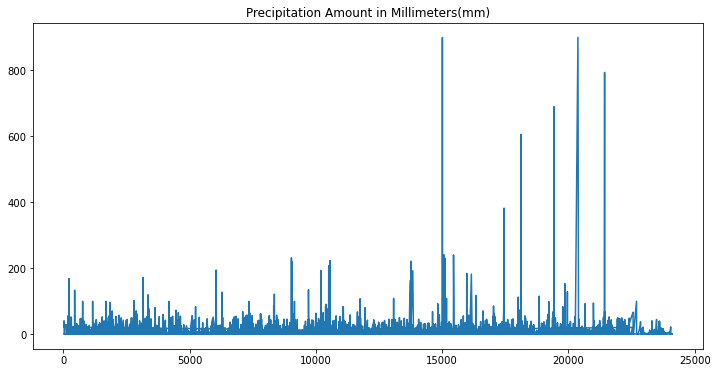

In [20]:
# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
plt.plot(clean_data_rf['RRR'])
plt.title('Precipitation Amount in Millimeters(mm)')
plt.show()

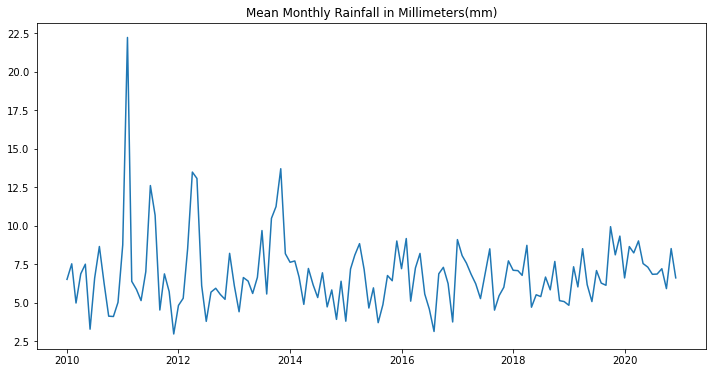

In [21]:
# precipitation per year
monthly_precipitation = clean_data_rf.groupby('year_month')['RRR'].mean().rename('Rainfall').reset_index()

# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x ='year_month',y='Rainfall',data=monthly_precipitation)
plt.title('Mean Monthly Rainfall in Millimeters(mm)')
plt.xlabel('')
plt.ylabel('')
plt.show()

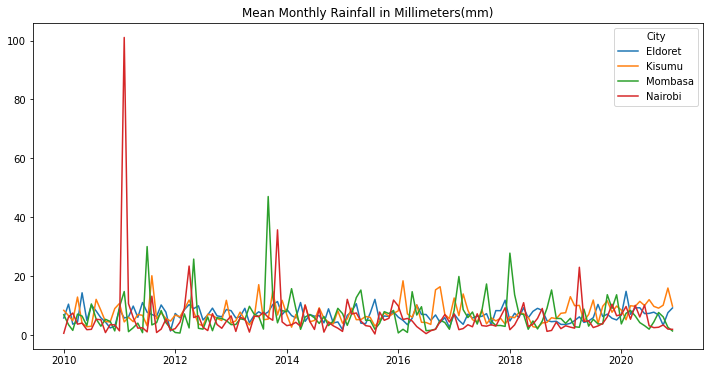

In [22]:
# check rainfall amount by city
city_monthly_precipitation=clean_data_rf.groupby(['City','year_month'])['RRR'].mean().rename('Rainfall').reset_index()

# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x ='year_month',y='Rainfall',hue='City',data=city_monthly_precipitation)
plt.title('Mean Monthly Rainfall in Millimeters(mm)')
plt.xlabel('')
plt.ylabel('')
plt.show()

- Nairobi had the highest amount of rainfall in 2011 (February)
- The precipitation follows a general trend of wet months followed by dry months
- Generally Mombasa receives higher amounts of rainfall during the wet months

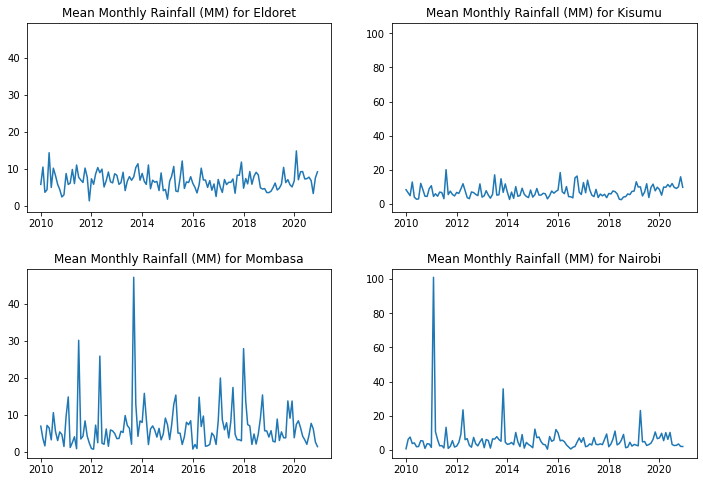

In [23]:
# plot data in different graphs
cities = city_monthly_precipitation['City'].unique()

# plot data
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.2)
(ax1,ax2),(ax3,ax4) = gs.subplots(sharey='col',sharex='row')

# get axes list
axes_list = [x for x in fig.axes]

# plot data
for i in range(len(cities)):
    filtered_data = city_monthly_precipitation[city_monthly_precipitation['City']==cities[i]]
    sns.lineplot(x='year_month',y='Rainfall',data = filtered_data,ax=axes_list[i])
    axes_list[i].set_title('Mean Monthly Rainfall (MM) for ' + cities[i])
    axes_list[i].set_xlabel('')
    axes_list[i].set_ylabel('')


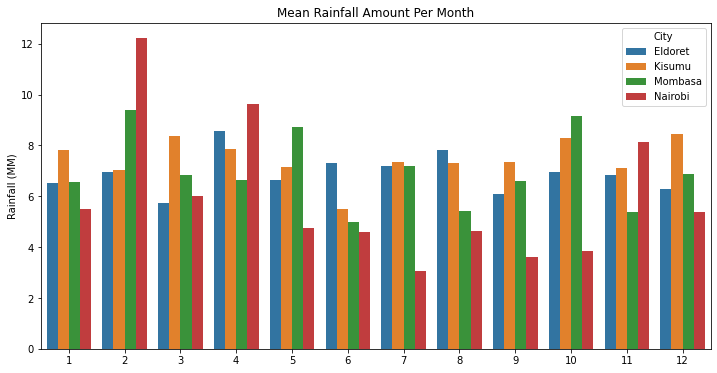

In [24]:
precipitation_by_month = clean_data_rf.groupby(['City','Month'])['RRR'].mean().rename('Rainfall').reset_index()

# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x ='Month',y='Rainfall',hue='City',data=precipitation_by_month)
plt.title('Mean Rainfall Amount Per Month')
plt.xlabel('')
plt.ylabel('Rainfall (MM)')
plt.show()

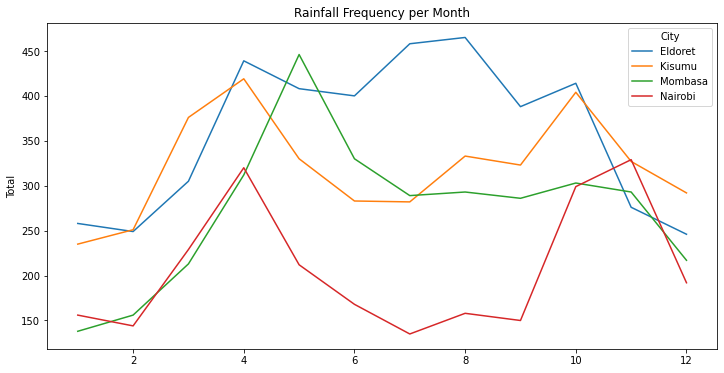

In [25]:
precipitation_by_month_freq = clean_data_rf.groupby(['City','Month'])['RRR'].count().rename('Rainfall').reset_index()
# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x ='Month',y='Rainfall',hue='City',data=precipitation_by_month_freq)
plt.title('Rainfall Frequency per Month')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

### 3.0 Atmospheric Pressure Analysis

In [26]:
clean_data_pa = clean_data[(clean_data['P'].isna()==False) & (clean_data['year_month']>='2010')]

In [27]:
clean_data_pa['City'].value_counts()

Malindi    44628
Mombasa    24174
Kisumu        21
Nairobi       14
Eldoret        8
Name: City, dtype: int64

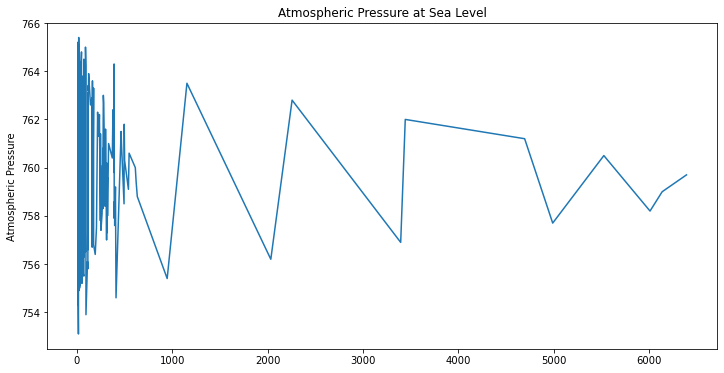

In [28]:
atm_pressure_sum = pd.DataFrame(clean_data_pa['P'].value_counts().reset_index())
atm_pressure_sum.columns=['Pressure','Count']
atm_pressure_sum = atm_pressure_sum[atm_pressure_sum['Count']>10]

# plot distribution
fig,ax = plt.subplots(figsize=(12,6))
plt.plot('Count','Pressure',data=atm_pressure_sum)
plt.title('Atmospheric Pressure at Sea Level')
plt.ylabel('Atmospheric Pressure')
plt.show()

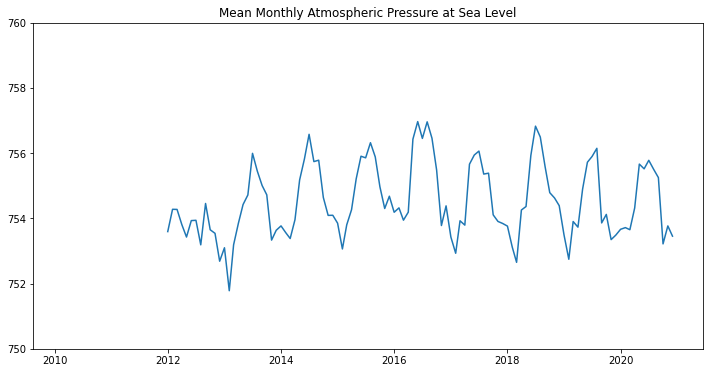

In [29]:
# precipitation per year
monthly_precipitation = clean_data_pa.groupby('year_month')['Po'].mean().rename('Pressure').reset_index()

# plot rainfall distribution
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x ='year_month',y='Pressure',data=monthly_precipitation)
plt.title('Mean Monthly Atmospheric Pressure at Sea Level')
plt.xlabel('')
plt.ylabel('')
plt.ylim(750,760)
plt.show()

- Mean Atmospheric pressure at sea level ranged between 750 and 760 in the last decade